In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [3]:
def plot_contour(x_contour,y_contour):            
    # now let's overplot some contours. First we have to make a 2d
    # histogram of the point distribution.
    vals, xedges, yedges = np.histogram2d(x_contour, y_contour, bins=30)
    # for scaling
    tvals, txedges, tyedges = np.histogram2d(x_contour, y_contour, bins=150)
       
    # Now we have the bin edges, but we want to find the bin centres to
    # plot the contour positions - they're half way between the edges:
    xbins = 0.5 * (xedges[:-1] + xedges[1:])
    ybins = 0.5 * (yedges[:-1] + yedges[1:])
    
    # now plot the contours
    plt.contourf(xbins, ybins, vals.T, 20, zorder=10)
    plt.xlim([-23,-16])
    plt.ylim([0.1,3.4])
    plt.xlabel('M r,petro')
    plt.ylabel('(u-r)model')
    title_str = 'Observed bivariate distribution of the sample in rest-frame color vs. \
    absolute magnitude. Sample size '+str(len(x_contour))+' galaxies. Colour plot 150 bins, Contour 30 bins.'
    plt.title(title_str)
    plt.colorbar()

In [4]:
def db_plot(file_name):    
    array = np.load(file_name)
    
    mean_x = np.mean([row[0] for row in array])
    mean_y = np.mean([row[1] for row in array])
    
    X = []
    scaled_X = []
    # array x,y,redshift,dustval
    for i, row in enumerate(array):
            if array[i][2] > 0.004 and array[i][2] < 0.08:
                if array[i][1] > 0 and array[i][1] < 3.5:
                    if array[i][0] < -15.5 and array[i][0] > -23.5:
                        X.append([array[i][0],array[i][1]])
                        scaled_X.append([array[i][0]/mean_x,array[i][1]/mean_y])
                        
    mean_x = np.mean([row[0] for row in X])
    mean_y = np.mean([row[1] for row in X])
    
    nscaled_X = [[row[0]/mean_x,row[1]/mean_y] for row in X]
    
    
    return X, scaled_X, nscaled_X

In [5]:
X, scaled_X, nscaled_X = db_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy')

In [6]:
X = np.array(X)
nscaled_X = np.array(nscaled_X)

In [7]:
nscaled_X.shape

(556156, 2)

In [8]:
clf = KMeans(n_clusters=3)
clf.fit(nscaled_X)
centers = clf.cluster_centers_
labels = clf.predict(nscaled_X)

In [9]:
x_zero = []
y_zero = []
x_one = []
y_one = []
x_two = []
y_two = []

In [10]:
for i,l in enumerate(labels):
    if l == 0:
        x_zero.append(X[i][0])
        y_zero.append(X[i][1])
    if l == 1:
        x_one.append(X[i][0])
        y_one.append(X[i][1])
    if l == 2:
        x_two.append(X[i][0])
        y_two.append(X[i][1])

In [11]:
x_zero = np.array(x_zero)
y_zero = np.array(y_zero)
x_one = np.array(x_one)
y_one = np.array(y_one)

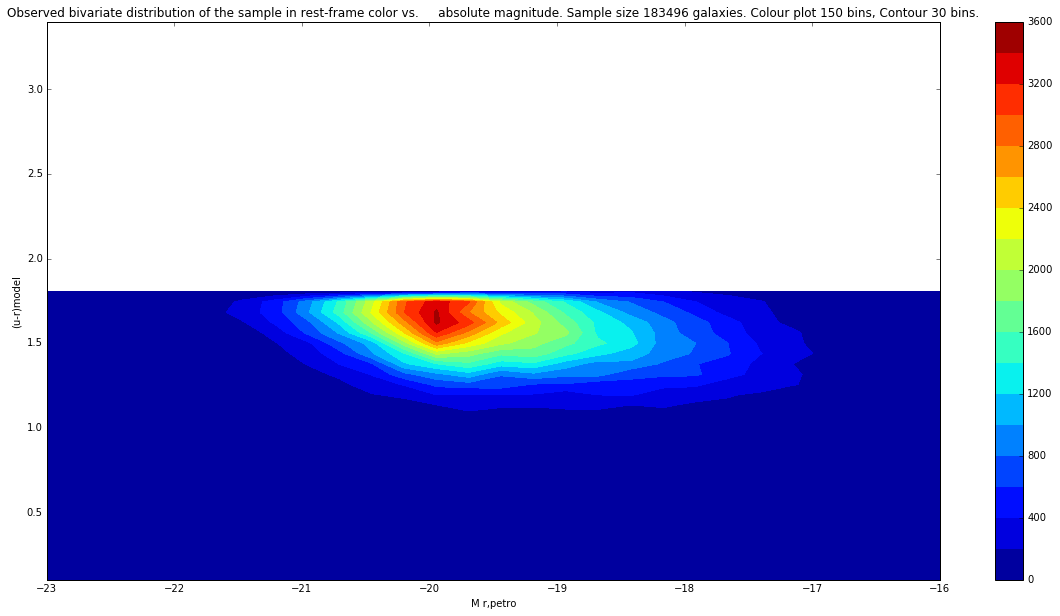

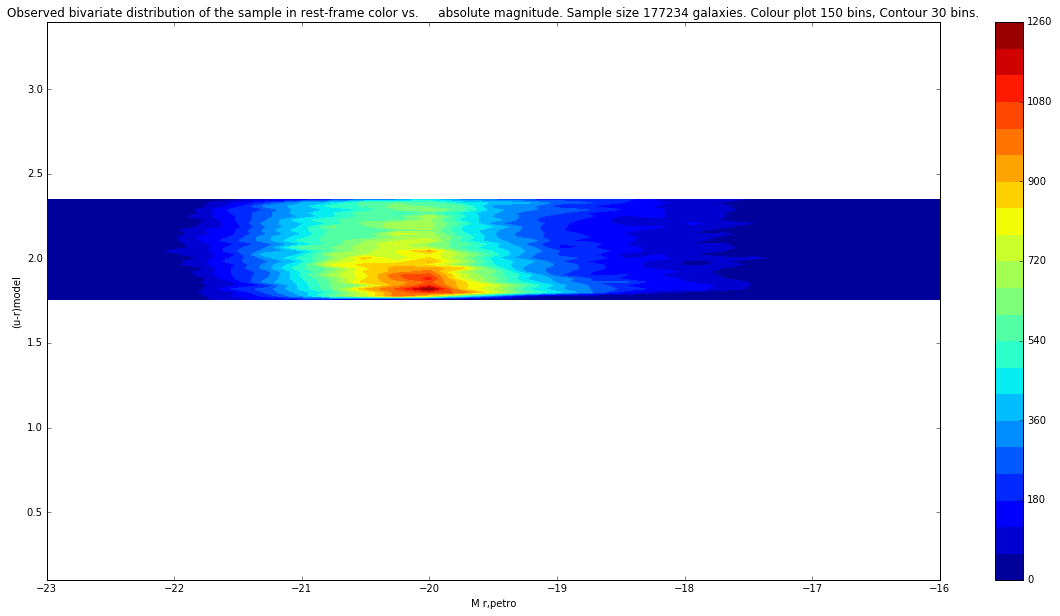

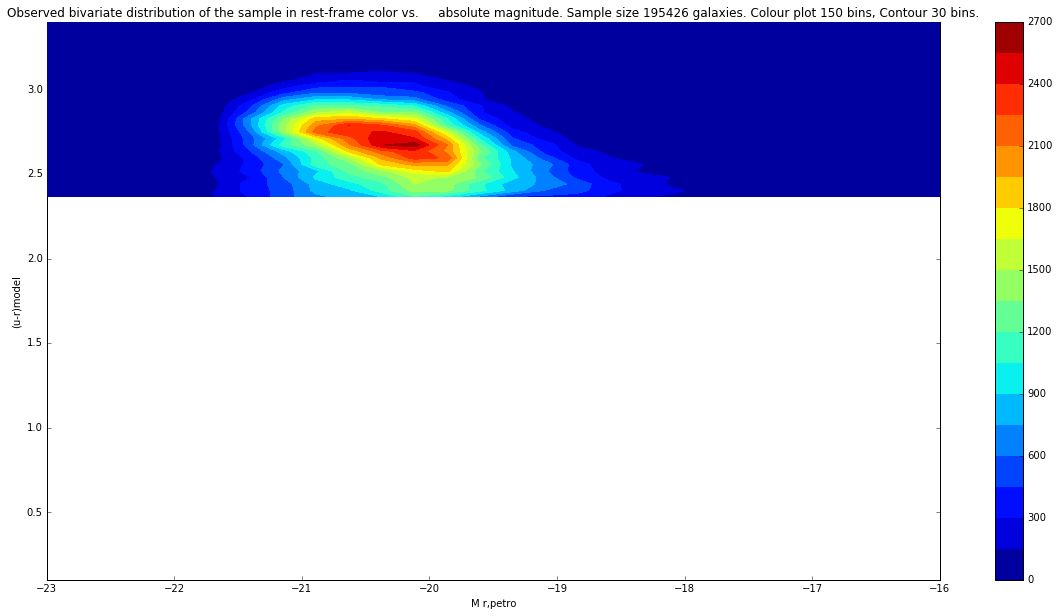

In [12]:
plt.figure(figsize=(20,10))
plot_contour(x_zero,y_zero)
plt.figure(figsize=(20,10))
plot_contour(x_two,y_two)
plt.figure(figsize=(20,10))
plot_contour(x_one,y_one)

In [15]:
def plot_hist(array,bin_num):
    weights = np.ones_like(array)/len(array)
    n, bins, patches = plt.hist(array,bins=bin_num,weights=weights)
    plt.close()
    return bins, n

In [16]:
plt.figure(figsize=(20,10))
bins_z, n_z = plot_hist(y_zero)
bins_o, n_o = plot_hist(y_one)
bins_t, n_t = plot_hist(y_two)

plt.figure(figsize=(20,10))
plt.plot(bins_z[1:], n_z,'b',label='Full sample')
plt.plot(bins_o[1:], n_o,'r',label='Full sample')
plt.plot(bins_t[1:], n_t,'g',label='Full sample')

TypeError: plot_hist() missing 1 required positional argument: 'bin_num'

In [17]:
def more_db_plot(file_name):    
    array = np.load(file_name)
    
    mean_x = np.mean([row[0] for row in array])
    mean_y = np.mean([row[1] for row in array])
    mean_z = np.mean([row[3] for row in array])

    
    X = []
    scaled_X = []
    # array x,y,redshift,dustval
    for i, row in enumerate(array):
            if array[i][2] > 0.004 and array[i][2] < 0.08:
                if array[i][1] > 0 and array[i][1] < 3.5:
                    if array[i][0] < -15.5 and array[i][0] > -23.5:
                        X.append([array[i][0],array[i][1],array[i][3]])
                        scaled_X.append([array[i][0]/mean_x,array[i][1]/mean_y,array[i][3]/mean_z])
                        
    mean_x = np.mean([row[0] for row in X])
    mean_y = np.mean([row[1] for row in X])
    mean_z = np.mean([row[2] for row in X])
    
    nscaled_X = [[row[0]/mean_x,row[1]/mean_y,row[2]/mean_z] for row in X]
    
    
    return X, scaled_X, nscaled_X

In [18]:
mX, mscaled_X, mnscaled_X = more_db_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy')

In [19]:
clf = KMeans(n_clusters=3)
clf.fit(mscaled_X)
centers = clf.cluster_centers_
labels = clf.predict(mscaled_X)

In [20]:
mx_zero = []
my_zero = []
mx_one = []
my_one = []
mx_two = []
my_two = []

In [21]:
for i,l in enumerate(labels):
    if l == 0:
        mx_zero.append(X[i][0])
        my_zero.append(X[i][1])
    if l == 1:
        mx_one.append(X[i][0])
        my_one.append(X[i][1])
    if l == 2:
        mx_two.append(X[i][0])
        my_two.append(X[i][1])
        
mx_zero = np.array(mx_zero)
my_zero = np.array(my_zero)
mx_one = np.array(mx_one)
my_one = np.array(my_one)

print(mx_zero.shape,my_zero.shape,mx_one.shape,my_one.shape)

(205941,) (205941,) (252513,) (252513,)


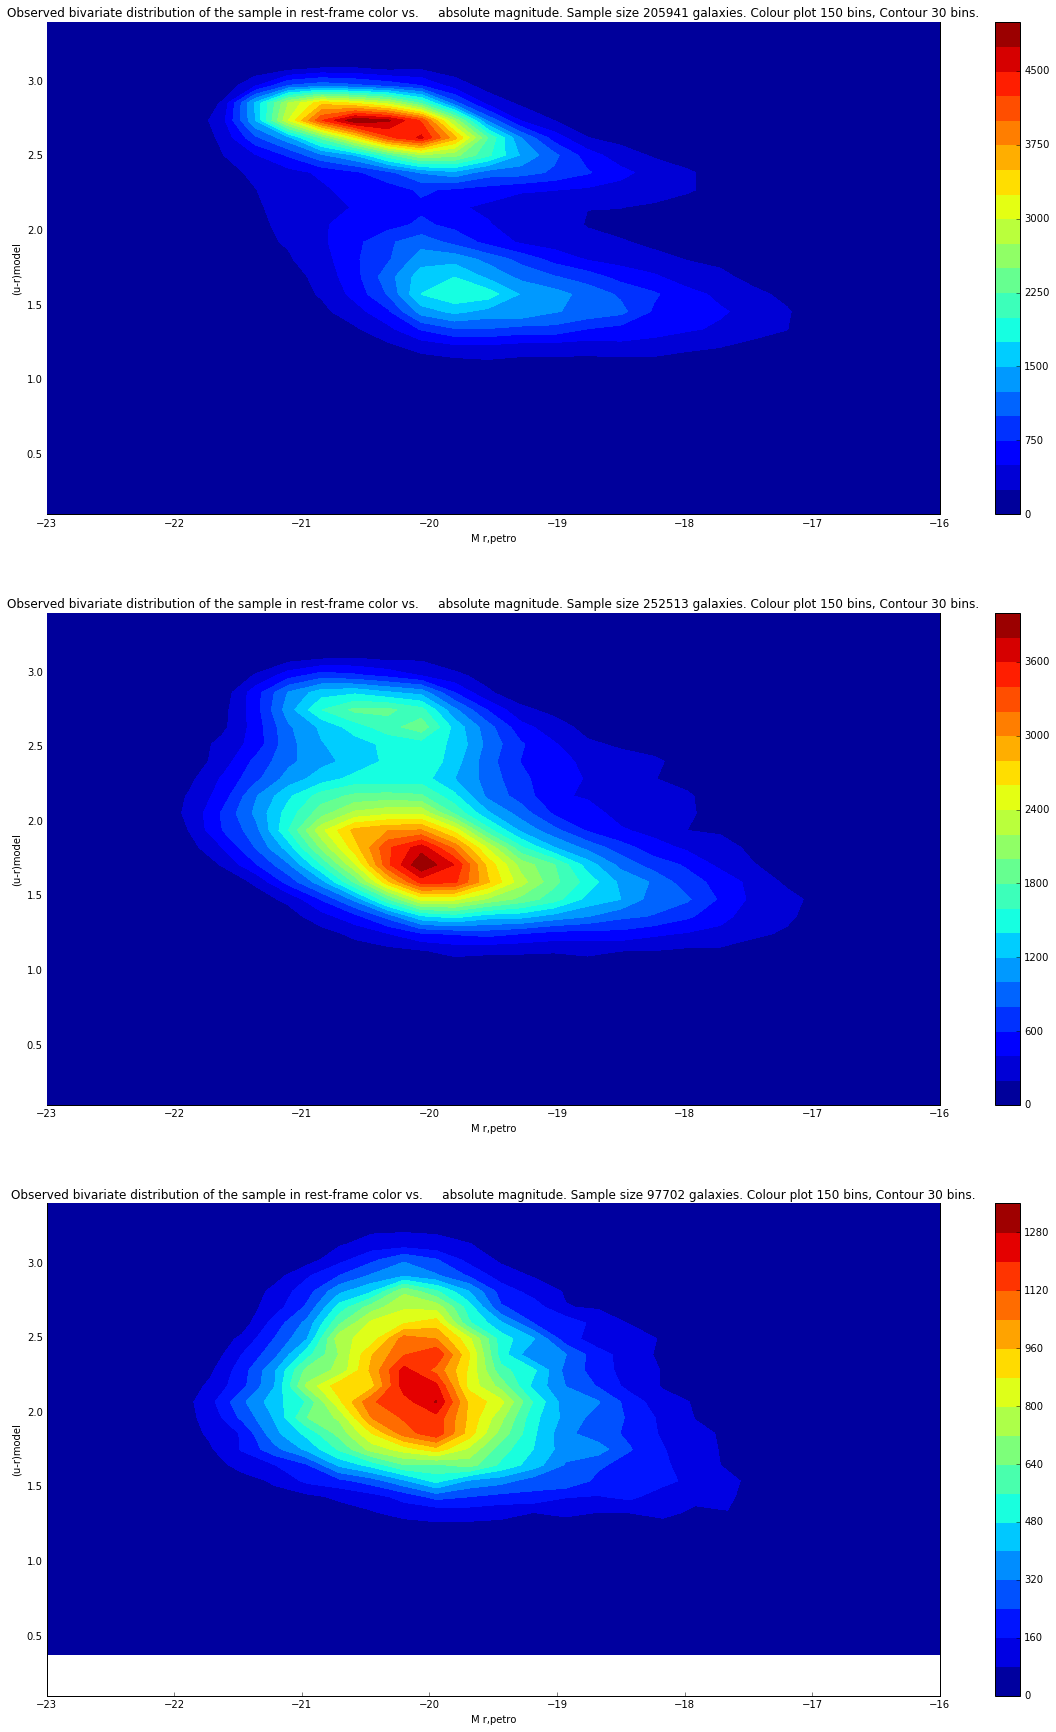

In [22]:
plt.figure(figsize=(20,30))
plt.subplot(311)
plot_contour(mx_zero,my_zero)
plt.subplot(312)
plot_contour(mx_one,my_one)
plt.subplot(313)
plot_contour(mx_two,my_two)

In [23]:
def cluster_plot(filename, num_clusters):
    # load data set, this dataset takes into account Mr , u-r and the dust extinction
    X, scaled_X, alt_scaled_X = more_db_plot(filename)
    
    # perform clustering
    clf = KMeans(n_clusters=num_clusters)
    clf.fit(scaled_X)
    centers = clf.cluster_centers_
    labels = clf.predict(scaled_X)
    
    # create dictionaries for each variable type to contain data
    x={}
    y={}
    dust={}
    for i in range(0,3):
        x["x_{0}".format(i)]=[]
        y["y_{0}".format(i)]=[]
        dust["dust_{0}".format(i)]=[]

    # get contour info for each cluster
    for i,l in enumerate(labels):
        for j in range(0,num_clusters):
            if l == j:
                x['x_'+str(j)].append(X[i][0])
                y['y_'+str(j)].append(X[i][1])
                dust['dust_'+str(j)].append(X[i][2])
      
    # plot clusters
    plt.figure(figsize=(20,10*num_clusters))
    for i in range(0,num_clusters):
        string = str(num_clusters)+'1'+str(i)
        plt.subplot(string)
        plot_contour(x['x_'+str(i)],y['y_'+str(i)])

    return  x,y,dust


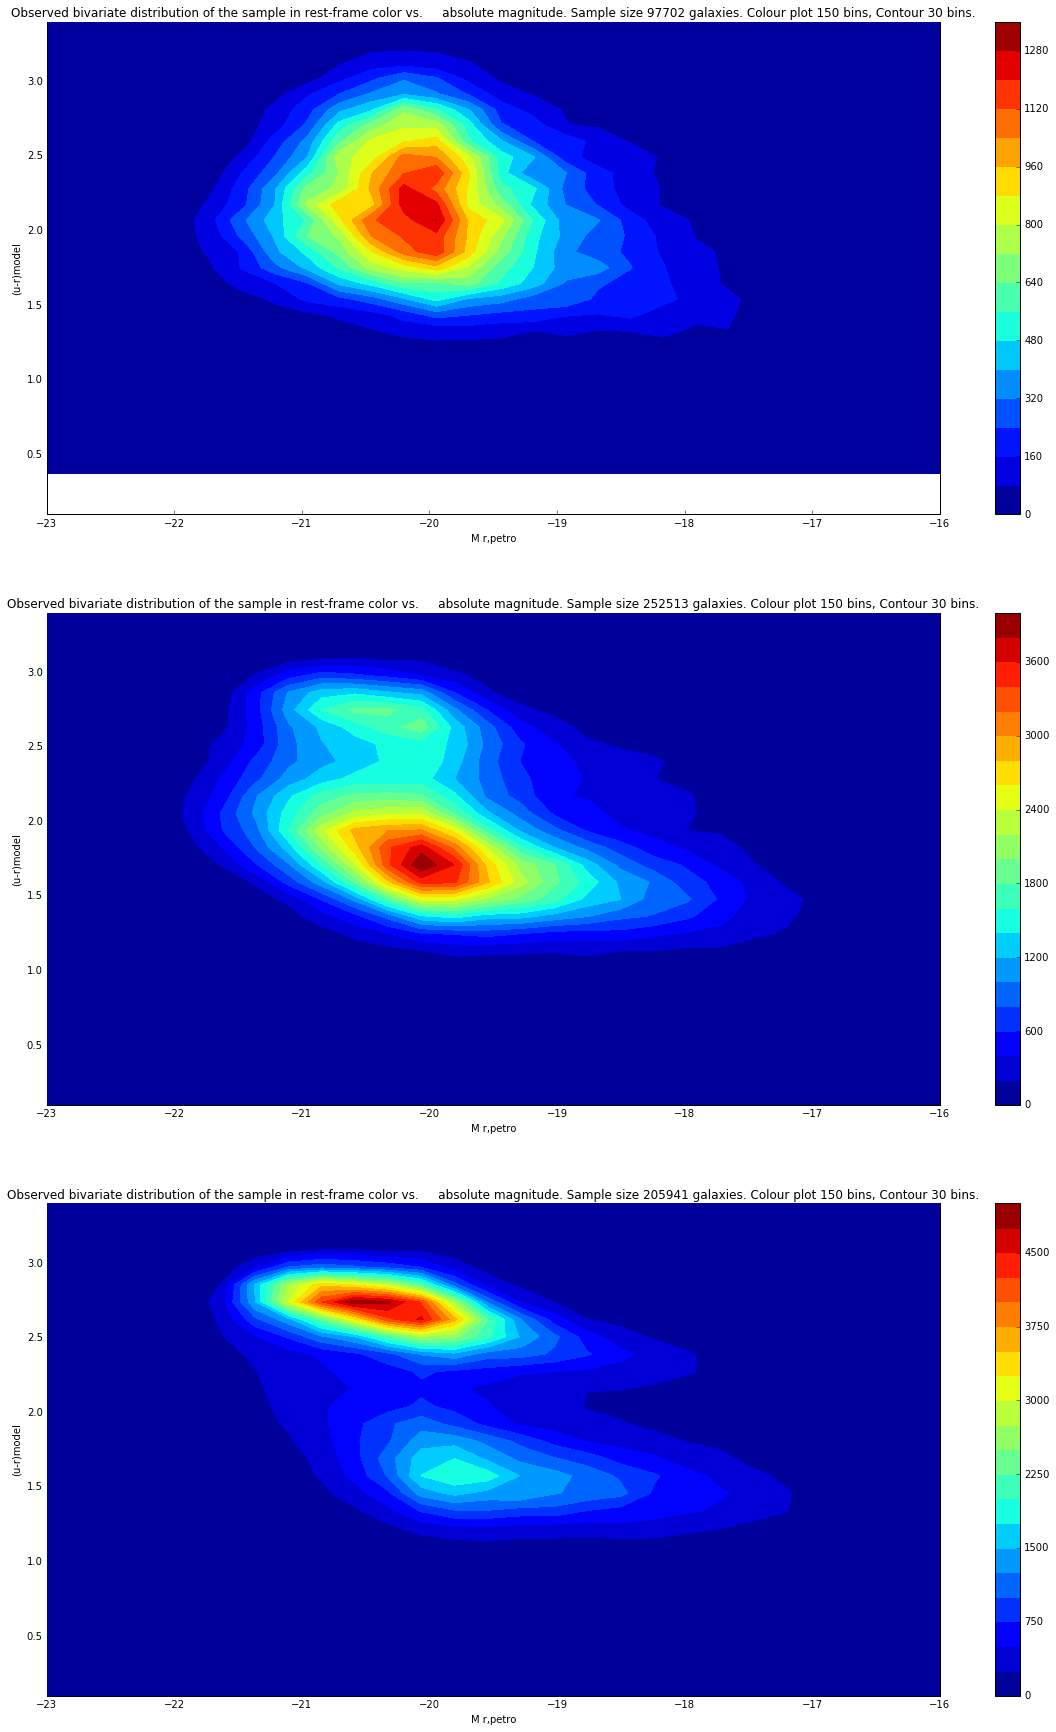

In [24]:
x, y, dust = cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',3)

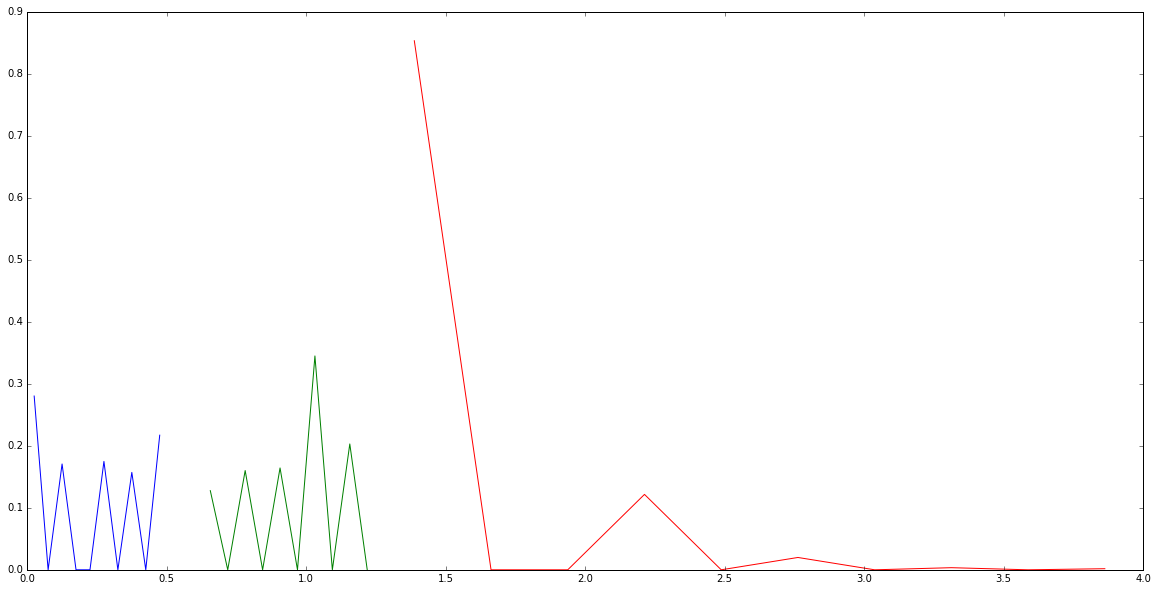

In [32]:
bins_z, n_z = plot_hist(dust['dust_0'],10)
bins_o, n_o = plot_hist(dust['dust_1'],10)
bins_t, n_t = plot_hist(dust['dust_2'],10)

z_step = (bins_z[1]-bins_z[0])/2
o_step = (bins_o[1]-bins_o[0])/2
t_step = (bins_t[1]-bins_t[0])/2

plt.figure(figsize=(20,10))
plt.plot(bins_z[:-1]+z_step,n_z, 'b',label='Full sample')
plt.plot(bins_o[:-1]+o_step, n_o,'r',label='Full sample')
plt.plot(bins_t[:-1]+t_step, n_t,'g',label='Full sample')

In [37]:
np.min(dust['dust_0']),np.max(dust['dust_0']),np.min(dust['dust_1']),np.max(dust['dust_1']),np.min(dust['dust_2']),np.max(dust['dust_2'])

(0.0, 0.5, 1.25, 4.0, 0.625, 1.25)

In [ ]:
len(y['y_0'])
plt.rcParams['agg.path.chunksize'] = 10000

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(dust['dust_0'],y['y_0'],'+')
plt.plot(dust['dust_1'],y['y_1'],'+')
plt.plot(dust['dust_2'],y['y_2'],'+')

In [ ]:
x_0 = cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',3)
plt.savefig('/home/calum/Documents/MPhysProj/cluster_analysis/dust_3_clusters.png')

In [ ]:
dust_0

In [ ]:
plt.hist(dust_0,bins=100)

In [ ]:
cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',2)
plt.savefig('/home/calum/Documents/MPhysProj/cluster_analysis/dust_2_clusters.png')

In [ ]:
cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',4)
plt.savefig('/home/calum/Documents/MPhysProj/cluster_analysis/dust_4_clusters.png')

In [ ]:
cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',8)

In [ ]:
def simple_cluster_plot(filename, num_clusters):
    # load data set, this dataset takes into account Mr , u-r and the dust extinction
    X, scaled_X, alt_scaled_X = db_plot(filename)
    
    # perform clustering
    clf = KMeans(n_clusters=num_clusters)
    clf.fit(scaled_X)
    centers = clf.cluster_centers_
    labels = clf.predict(scaled_X)
    
    # create arrays to store each of the clusters
    for i in range(0,num_clusters):
        exec('x_'+str(i)+ " = []")
        exec('y_'+str(i)+ " = []")

    # get contour info for each cluster
    for i,l in enumerate(labels):
        for j in range(0,num_clusters):
            if l == j:
                exec('x_'+str(j)+ ".append(X[i][0])")
                exec('y_'+str(j)+ ".append(X[i][1])")
    
    # convert to numpy
    for i in range(0,num_clusters):
        exec('np.array(x_'+str(i)+ ")")
        exec('np.array(x_'+str(j)+ ")")   
    
    # plot clusters
    plt.figure(figsize=(20,10*num_clusters))
    for i in range(0,num_clusters):
        string = str(num_clusters)+'1'+str(i)
        plt.subplot(string)
        exec('plot_contour(x_'+str(i)+',y_'+str(i)+')') 
        print('plot_contour(x_'+str(i)+',y_'+str(i)+')')

In [ ]:
simple_cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',8)

In [ ]:
simple_cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',3)
plt.savefig('/home/calum/Documents/MPhysProj/cluster_analysis/red_blue_clouds.png')

In [ ]:
def distance_cluster_plot(filename, num_clusters):
    # load data set, this dataset takes into account Mr , u-r and the dust extinction
    X, scaled_X, alt_scaled_X = db_plot(filename)
    
    # perform clustering
    clf = KMeans(n_clusters=num_clusters,precompute_distances=True)
    clf.fit(X)
    centers = clf.cluster_centers_
    labels = clf.predict(X)
    
    # create arrays to store each of the clusters
    for i in range(0,num_clusters):
        exec('x_'+str(i)+ " = []")
        exec('y_'+str(i)+ " = []")

    # get contour info for each cluster
    for i,l in enumerate(labels):
        for j in range(0,num_clusters):
            if l == j:
                exec('x_'+str(j)+ ".append(X[i][0])")
                exec('y_'+str(j)+ ".append(X[i][1])")
    
    # convert to numpy
    for i in range(0,num_clusters):
        exec('np.array(x_'+str(i)+ ")")
        exec('np.array(x_'+str(j)+ ")")   
    
    # plot clusters
    plt.figure(figsize=(20,10*num_clusters))
    for i in range(0,num_clusters):
        string = str(num_clusters)+'1'+str(i)
        plt.subplot(string)
        exec('plot_contour(x_'+str(i)+',y_'+str(i)+')') 
        print('plot_contour(x_'+str(i)+',y_'+str(i)+')')

In [ ]:
distance_cluster_plot('/home/calum/Documents/MPhysProj/data/vespa_data/dust_extinction_dust2.npy',3)
plt.savefig('/home/calum/Documents/MPhysProj/cluster_analysis/bimodality_with_scaling.png')